In [1]:
import numpy, seaborn

In [2]:
import pandas
pandas.set_option('display.max_colwidth', None)

In [3]:
import scipy, scipy.signal, scipy.optimize
import statsmodels, statsmodels.stats, statsmodels.stats.multitest

In [4]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [5]:
input_file = '230117_Arnar.lfq.proteins_From_Gudrun.xlsx'
df = pandas.read_excel(input_file)
df.shape

(7841, 88)

In [6]:
labels = []
for element in df.columns:
    if 'ADRNOR_4H_' in element:
        labels.append(element)
    if 'CTRL_4H_' in element:
        labels.append(element)
    if 'ADRNOR_24H_' in element:
        labels.append(element)
    if 'CTRL_24H_' in element:
        labels.append(element)

working_labels=['adr4_a', 'adr4_b', 'adr4_c', 'ctl4_a', 'ctl4_b', 'ctl4_c', 'adr24_a', 'adr24_b', 'adr24_c', 'ctl24_a', 'ctl24_b', 'ctl24_c']
for i in range(12):
    print(working_labels[i], '\t', labels[i*2], labels[(i*2)+1])
    df.insert(0, 
              working_labels[i], 
              numpy.median(df.loc[:, [labels[i*2], labels[(i*2)+1]]], axis=1))

print(df.loc[:, 'ctl24_c'])
print(df.loc[:, ['CTRL_24H_3_1_2846 Area', 'CTRL_24H_3_2_2847 Area']])

adr4_a 	 ADRNOR_4H_1_1_2792 Area ADRNOR_4H_1_2_2793 Area
adr4_b 	 ADRNOR_4H_2_1_2795 Area ADRNOR_4H_2_2_2796 Area
adr4_c 	 ADRNOR_4H_3_1_2798 Area ADRNOR_4H_3_2_2799 Area
ctl4_a 	 CTRL_4H_1_1_2752 Area CTRL_4H_1_2_2753 Area
ctl4_b 	 CTRL_4H_2_1_2755 Area CTRL_4H_2_2_2756 Area
ctl4_c 	 CTRL_4H_3_1_2758 Area CTRL_4H_3_2_2759 Area
adr24_a 	 ADRNOR_24H_1_1_2931 Area ADRNOR_24H_1_2_2932 Area
adr24_b 	 ADRNOR_24H_2_1_2934 Area ADRNOR_24H_2_2_2935 Area
adr24_c 	 ADRNOR_24H_3_1_2937 Area ADRNOR_24H_3_2_2938 Area
ctl24_a 	 CTRL_24H_1_1_2840 Area CTRL_24H_1_2_2841 Area
ctl24_b 	 CTRL_24H_2_1_2843 Area CTRL_24H_2_2_2844 Area
ctl24_c 	 CTRL_24H_3_1_2846 Area CTRL_24H_3_2_2847 Area
0       122919.07000
1        69911.99500
2         1436.45775
3        16612.29600
4         1099.22090
            ...     
7836      2174.96395
7837      2356.92770
7838      1411.05745
7839       265.90055
7840    124825.44300
Name: ctl24_c, Length: 7841, dtype: float64
      CTRL_24H_3_1_2846 Area  CTRL_24H_3_2_2847

In [7]:
# there are 2,074 duplicated measurements
print(df.shape)

duplicate_rows = df.duplicated(subset=working_labels)
print(sum(duplicate_rows))

df.drop_duplicates(subset=working_labels, inplace=True)
print(df.shape)

(7841, 100)
2073
(5768, 100)


In [8]:
expression = df.loc[:, working_labels]
expression

,adr4_a,adr4_b,adr4_c,ctl4_a,ctl4_b,ctl4_c,adr24_a,adr24_b,adr24_c,ctl24_a,ctl24_b,ctl24_c
0,65495.316500,85802.715000,107049.96800,74730.060000,58426.502000,79745.793000,95446.55000,107321.720000,92719.79000,93315.585000,94285.127000,122919.07000
1,37783.377000,45287.551000,71625.20500,60713.177000,49429.075000,51736.767500,60278.83600,51300.153000,70530.63250,85968.158000,77531.267500,69911.99500
2,1248.864050,1276.184400,665.27760,1023.670450,1008.338200,586.370725,621.08355,1314.238250,976.91325,1193.317125,764.650605,1436.45775
3,54415.652000,58750.342500,9318.80320,54141.580500,35658.565000,56442.270000,20280.72750,45122.106500,33279.36900,18966.433500,16857.171000,16612.29600
4,343.877655,487.092185,919.51117,280.563810,314.254565,353.206300,866.44315,765.353415,575.28780,811.901880,1266.959800,1099.22090
...,...,...,...,...,...,...,...,...,...,...,...,...
7829,9843.608000,14446.912500,20861.16600,16086.047000,8270.269550,13560.721500,32473.35000,12309.869500,12275.09050,21112.132000,14338.070000,21656.27150
7832,2119.290400,1671.020650,1245.87550,3188.437250,2184.048250,2554.703250,1177.93965,1300.223300,1639.93450,1183.416025,1557.551150,1125.42898
7834,845.612725,1475.588700,64.74116,799.086235,2341.668950,1643.316650,1493.64315,1872.925000,1176.17315,768.291970,246.896375,1365.90435
7836,1514.782000,1643.146050,3810.24865,2836.439200,1851.847300,2656.190300,2511.21670,1715.086950,1418.04345,1688.109150,3146.550350,2174.96395


In [18]:
# make histogram
all_values = expression.to_numpy().flatten()
print(len(all_values))
print(min(all_values), max(all_values))

69216
0.0 1594512.0499999998


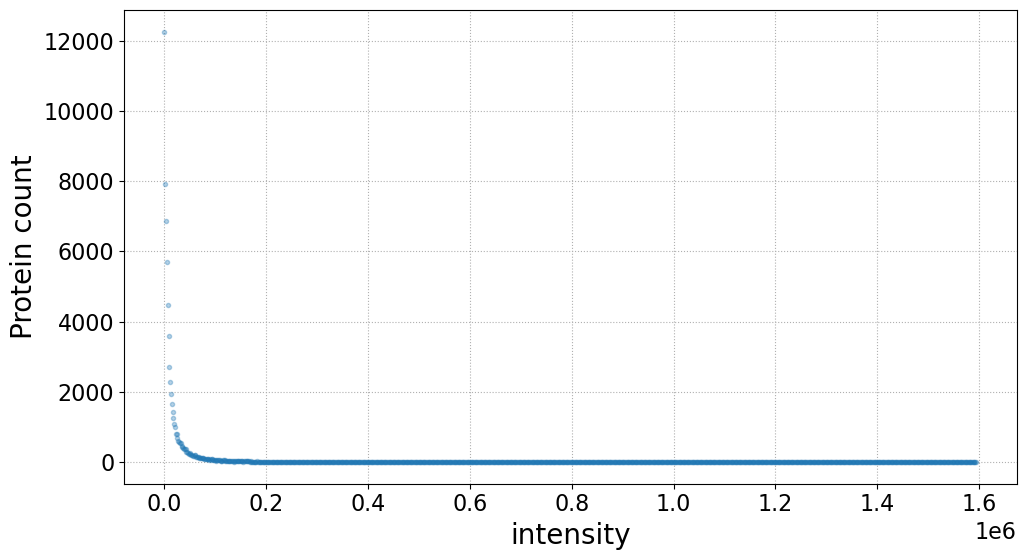

In [21]:
found_max = numpy.max(all_values)
number_of_bins = 1000
        
hist, bin_edges = numpy.histogram(all_values, bins=number_of_bins, range=(0, found_max))
half_bin = (bin_edges[1] - bin_edges[0])/2
x = bin_edges + half_bin
x = x[:-1]
 
    
matplotlib.pyplot.plot(x, hist, '.', alpha=1/3)
    
matplotlib.pyplot.xlabel('intensity')
matplotlib.pyplot.ylabel('Protein count')
matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.tight_layout()

